In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [7]:
# Step 2: Load the dataset
deliveries = pd.read_csv('deliveries.csv')  # Ensure file path is correct
matches = pd.read_csv("matches.csv")

In [9]:
# Step 3: Filter data for the specific player (V Kohli)
kohli_scores = deliveries[deliveries['batter'] == 'V Kohli']

In [11]:
# Step 4: Group data by 'match_id' to compute total runs per match
kohli_runs_per_match = kohli_scores.groupby('match_id')['batsman_runs'].sum().reset_index()

In [13]:
# Step 5: Limit the data to the first 240 matches for ARIMA analysis
kohli_runs_limited = kohli_runs_per_match.head(240).copy()

In [15]:
# Step 6: Prepare data for ARIMA - Add sequential match numbers
kohli_runs_limited['match_number'] = range(1, len(kohli_runs_limited) + 1)
kohli_runs_limited = kohli_runs_limited.set_index('match_number')

In [17]:
# Step 7: Fit the ARIMA model with (p=1, d=1, q=1)
arima_model = ARIMA(kohli_runs_limited['batsman_runs'], order=(1, 1, 1))
arima_result = arima_model.fit()

C:\Users\Dolli\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dolli\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dolli\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
# Step 8: Forecast future runs for the next 5 matches
forecast_steps = 5
forecast = arima_result.forecast(steps=forecast_steps)

C:\Users\Dolli\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dolli\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


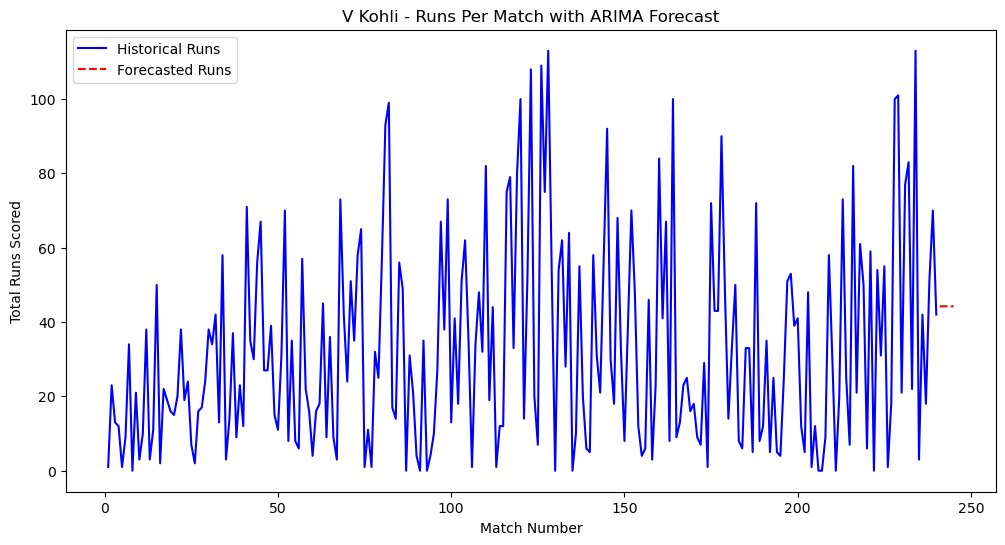

In [21]:
# Step 9: Visualize historical and forecasted runs
plt.figure(figsize=(12, 6))
plt.plot(kohli_runs_limited.index, kohli_runs_limited['batsman_runs'], label='Historical Runs', color='blue')
plt.plot(range(len(kohli_runs_limited) + 1, len(kohli_runs_limited) + 1 + forecast_steps), forecast, 
         label='Forecasted Runs', color='red', linestyle='--')
plt.xlabel('Match Number')
plt.ylabel('Total Runs Scored')
plt.title('V Kohli - Runs Per Match with ARIMA Forecast')
plt.legend()
plt.show()

In [23]:
# Step 10: Print forecasted values
print("Forecasted Runs for the Next Matches:")
print(forecast)

Forecasted Runs for the Next Matches:
240    44.189547
241    44.237982
242    44.239054
243    44.239078
244    44.239078
Name: predicted_mean, dtype: float64
